 # 1. Importing Libraries and dataset

In [63]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
# Loading the dataset
og_data=pd.read_csv('Cardiotocographic.csv')

In [65]:
og_data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [66]:
og_data.tail()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
2121,140.0,0.000000,0.961268,0.007426,0.0,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.0,2.000000
2122,140.0,0.000775,0.000000,0.006979,0.0,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.0,2.000000
2123,140.0,0.000980,0.000000,0.006863,0.0,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.0,1.990464
2124,140.0,0.000679,0.000000,0.006110,0.0,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.0,2.000000
2125,142.0,0.001616,-0.000188,0.008078,0.0,0.0,0.0,74.0,0.4,35.857183,5.0,42.0,0.0,1.000000


In [67]:
og_data.shape

(2126, 14)

In [68]:
og_data.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [69]:
og_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [70]:
df=og_data.copy()

## Data Cleaning and preparation

In [71]:
# To check missing values
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [72]:
# Filling missing values with mean values
df.fillna({
    'LB': df['LB'].mean(),
    'AC':df['AC'].mean(),
    'DS':df['DS'].mean(),
    'DP': df['DP'].mean(),
    'MLTV':df['MLTV'].mean(),
    'Width': df['Width'].mean(),
    'Tendency':df['Tendency'].mean(),
    'NSP': df['NSP'].mean(),
}, inplace=True)

In [73]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

### Removing duplicates

In [74]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Length: 2126, dtype: bool

In [75]:
df[ df.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [76]:
df.drop_duplicates(inplace=True)

In [77]:
df.shape

(2124, 14)

In [78]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [79]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000
mean,133.342039,0.003220,0.009904,0.004394,0.001897,0.000003,0.000175,47.012459,1.364345,10.295650,8.280589,70.460738,0.316669,1.304794
std,11.212396,0.004371,0.067571,0.003340,0.003344,0.000141,0.000836,18.812403,1.174084,21.212676,7.736420,42.726905,0.642653,0.641660
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [80]:
# Convert columns to appropriate data types 
# Assuming all columns should be numeric
df = df.apply(pd.to_numeric, errors='coerce')

In [81]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


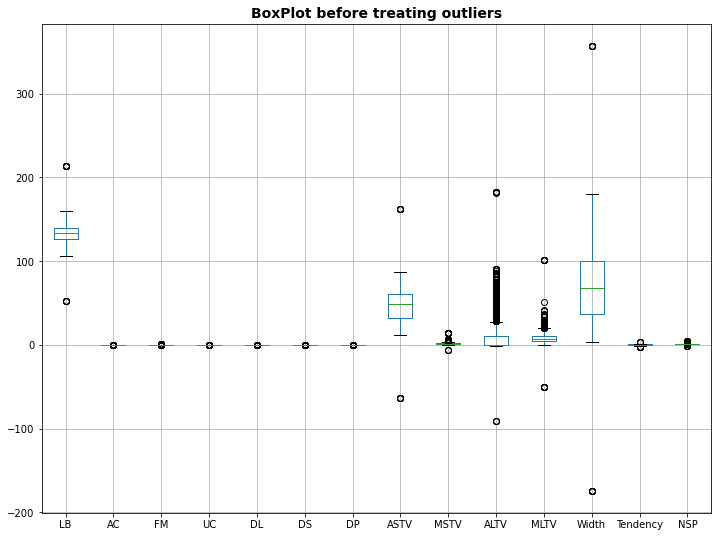

In [82]:
# Plot boxplot before treating outliers
plt.figure(figsize=(12, 9))
df.boxplot()
plt.title('BoxPlot before treating outliers',fontweight='bold', fontsize=14)
plt.show()

In [83]:
# Function to detect and treat outliers using IQR method
# forloop is applied to treat_outliers function to each column in the DataFrame.
def treat_outliers(df, column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR=q3-q1
    IQR
    upper_extreme=q3+1.5*IQR
    upper_extreme
    lower_extreme=q1-1.5*IQR
    lower_extreme
    df[column] = np.where(df[column] < lower_extreme, lower_extreme, df[column])
    df[column] = np.where(df[column] > upper_extreme, upper_extreme, df[column])
    return df 

In [84]:
# Detect and treat outliers for each column
for column in df.columns:
    df = treat_outliers(df, column)

In [85]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,27.5,2.4,64.0,0.999926,1.0
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,20.1,117.0,1.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006421,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,0.000000,1.0
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,1.000000,1.0
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,1.000000,1.0
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,1.000000,1.0


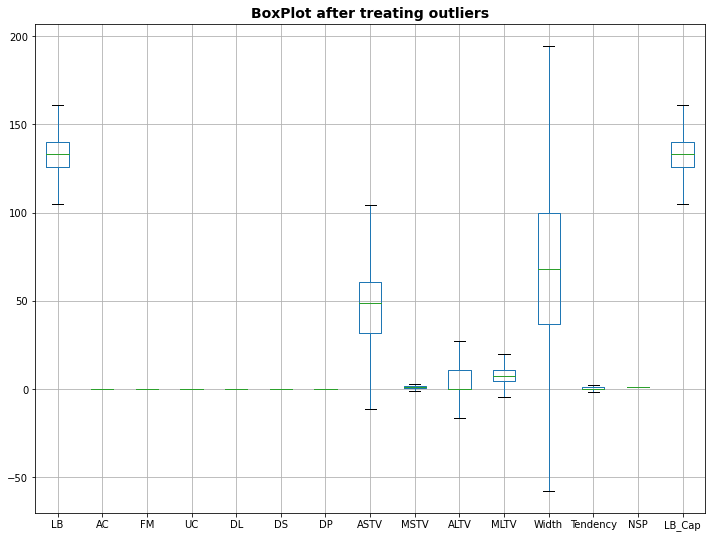

In [51]:
# Plot boxplot after treating outliers
plt.figure(figsize=(12, 9))
df.boxplot()
plt.title('BoxPlot after treating outliers',fontweight='bold', fontsize=14)
plt.show()

# 02.Statistical Summary

In [86]:
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
LB,2124.0,133.292118,9.926749,105.000000,126.000000,133.000000,140.000000,161.000000
AC,2124.0,0.003148,0.003827,-0.008418,0.000000,0.001668,0.005612,0.014030
FM,2124.0,0.001570,0.002487,-0.003853,0.000000,0.000000,0.002568,0.006421
UC,2124.0,0.004365,0.003001,-0.005158,0.001858,0.004486,0.006536,0.013552
DL,2124.0,0.001772,0.002670,-0.004938,0.000000,0.000000,0.003292,0.008230
DS,2124.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,2124.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,2124.0,46.998334,17.609911,-11.500000,32.000000,49.000000,61.000000,104.500000
MSTV,2124.0,1.304554,0.781303,-0.800000,0.700000,1.200000,1.700000,3.200000
ALTV,2124.0,6.697979,10.381254,-16.500000,0.000000,0.000000,11.000000,27.500000


In [87]:
summary['median']=df.median()
summary

,count,mean,std,min,25%,50%,75%,max,median
LB,2124.0,133.292118,9.926749,105.000000,126.000000,133.000000,140.000000,161.000000,133.000000
AC,2124.0,0.003148,0.003827,-0.008418,0.000000,0.001668,0.005612,0.014030,0.001668
FM,2124.0,0.001570,0.002487,-0.003853,0.000000,0.000000,0.002568,0.006421,0.000000
UC,2124.0,0.004365,0.003001,-0.005158,0.001858,0.004486,0.006536,0.013552,0.004486
DL,2124.0,0.001772,0.002670,-0.004938,0.000000,0.000000,0.003292,0.008230,0.000000
DS,2124.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,2124.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,2124.0,46.998334,17.609911,-11.500000,32.000000,49.000000,61.000000,104.500000,49.000000
MSTV,2124.0,1.304554,0.781303,-0.800000,0.700000,1.200000,1.700000,3.200000,1.200000
ALTV,2124.0,6.697979,10.381254,-16.500000,0.000000,0.000000,11.000000,27.500000,0.000000


In [88]:
summary['IQR'] =  df.quantile(0.75)-df.quantile(0.25)
summary

,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,2124.0,133.292118,9.926749,105.000000,126.000000,133.000000,140.000000,161.000000,133.000000,14.000000
AC,2124.0,0.003148,0.003827,-0.008418,0.000000,0.001668,0.005612,0.014030,0.001668,0.005612
FM,2124.0,0.001570,0.002487,-0.003853,0.000000,0.000000,0.002568,0.006421,0.000000,0.002568
UC,2124.0,0.004365,0.003001,-0.005158,0.001858,0.004486,0.006536,0.013552,0.004486,0.004678
DL,2124.0,0.001772,0.002670,-0.004938,0.000000,0.000000,0.003292,0.008230,0.000000,0.003292
DS,2124.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,2124.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,2124.0,46.998334,17.609911,-11.500000,32.000000,49.000000,61.000000,104.500000,49.000000,29.000000
MSTV,2124.0,1.304554,0.781303,-0.800000,0.700000,1.200000,1.700000,3.200000,1.200000,1.000000
ALTV,2124.0,6.697979,10.381254,-16.500000,0.000000,0.000000,11.000000,27.500000,0.000000,11.000000


## 03.Data Visualization

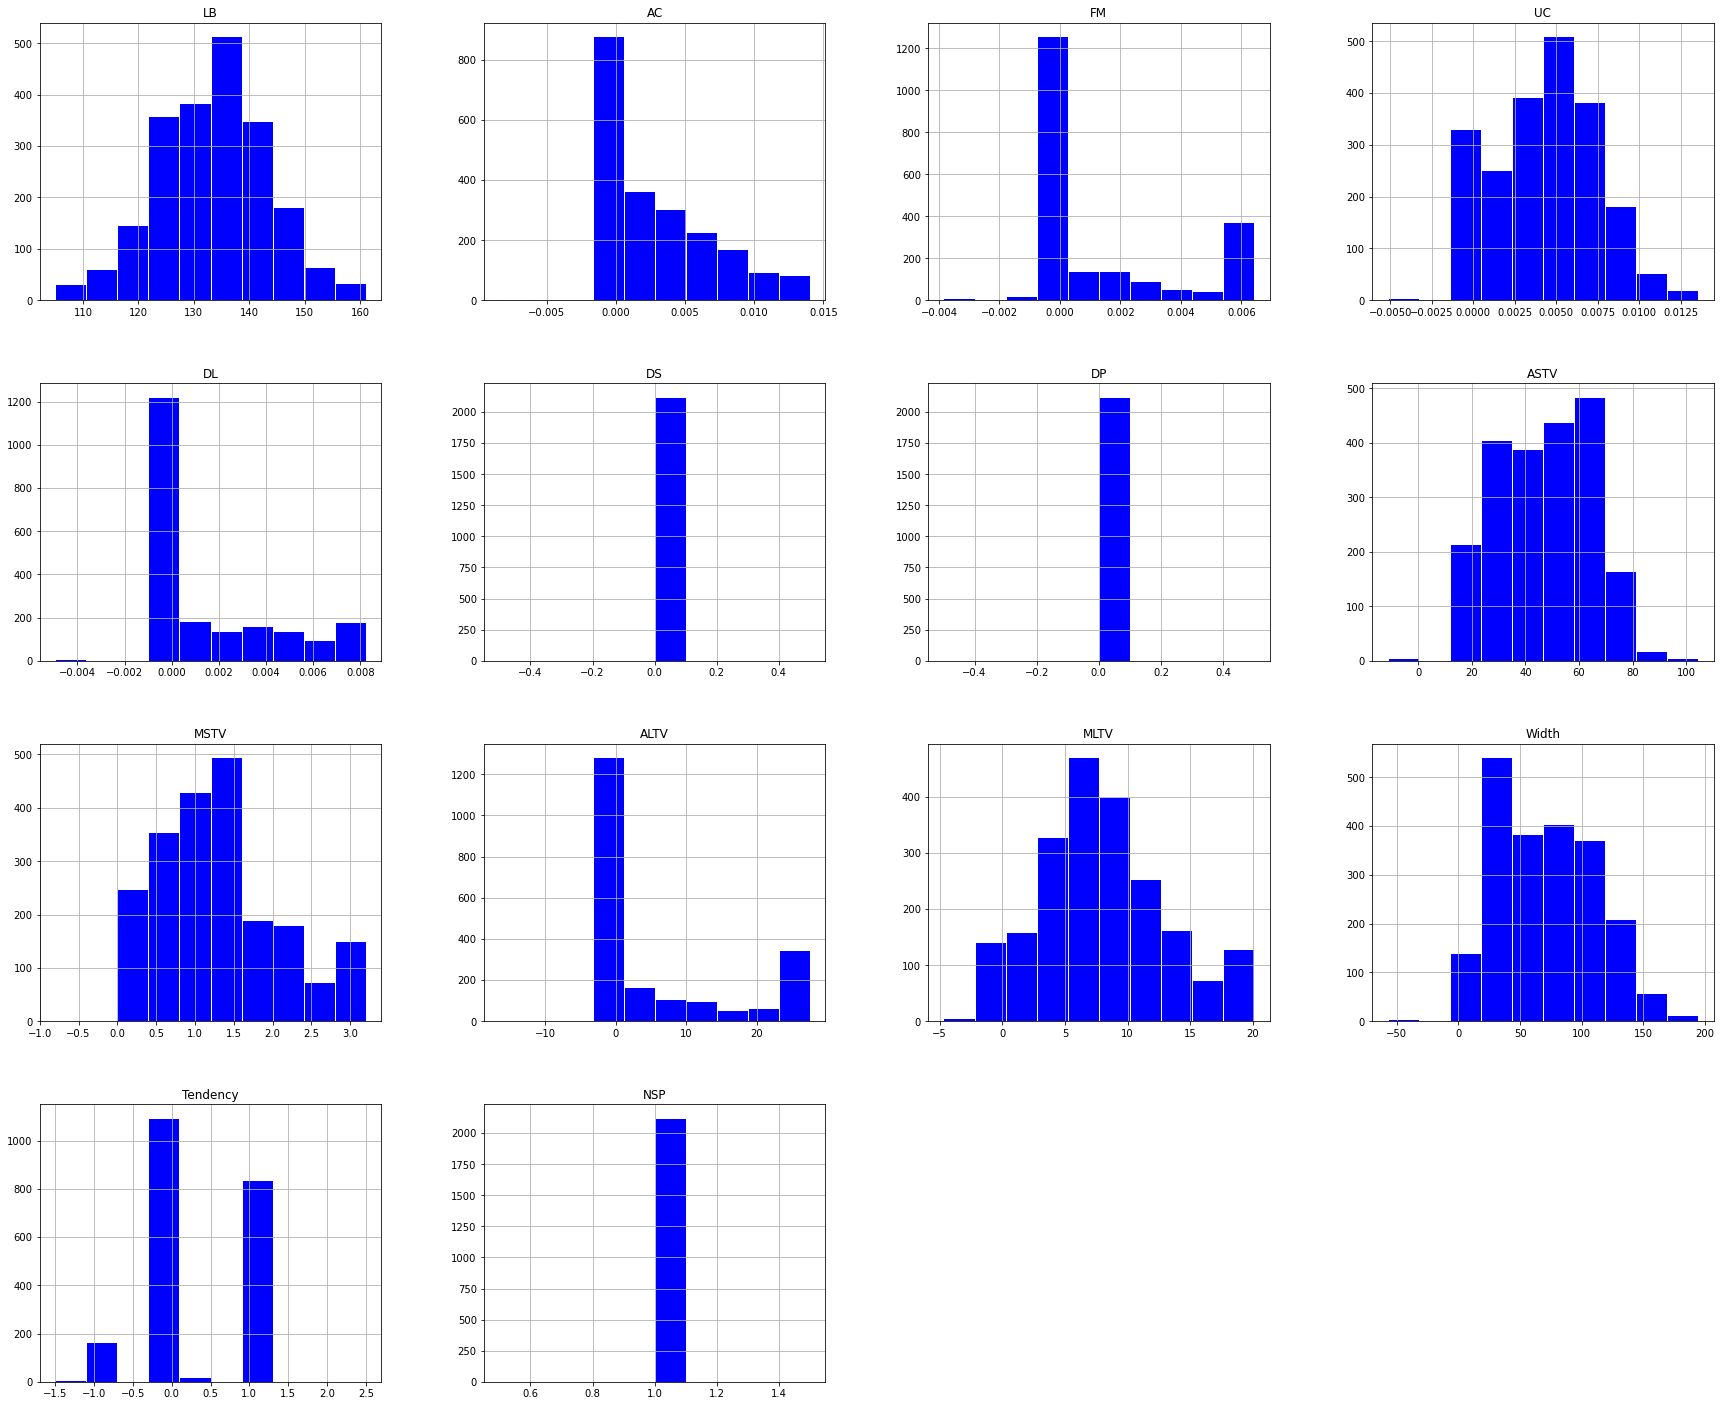

In [89]:
#Create Histogram for each numerical variable
df.hist(edgecolor='white', color='Blue', bins=10,figsize=(30, 25))
plt.show()

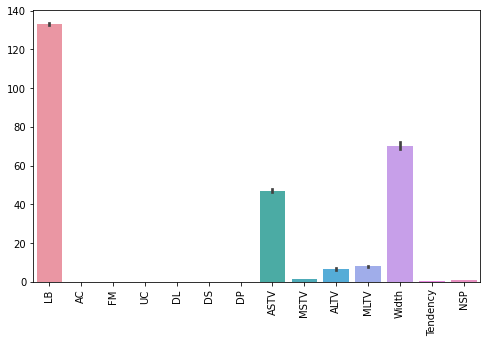

In [96]:
# Create barchart for each numerical variable
plt.figure(figsize=(8,5))
sns.barplot(data=df)
plt.xticks(rotation=90)
plt.show()

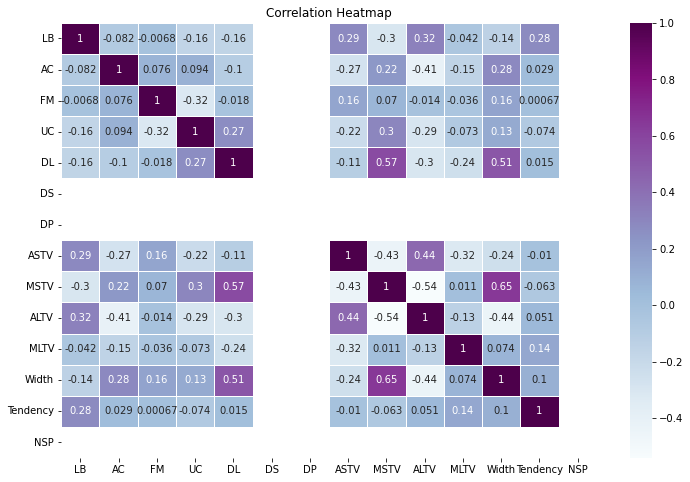

In [91]:
# Generate a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='BuPu', annot=True,linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

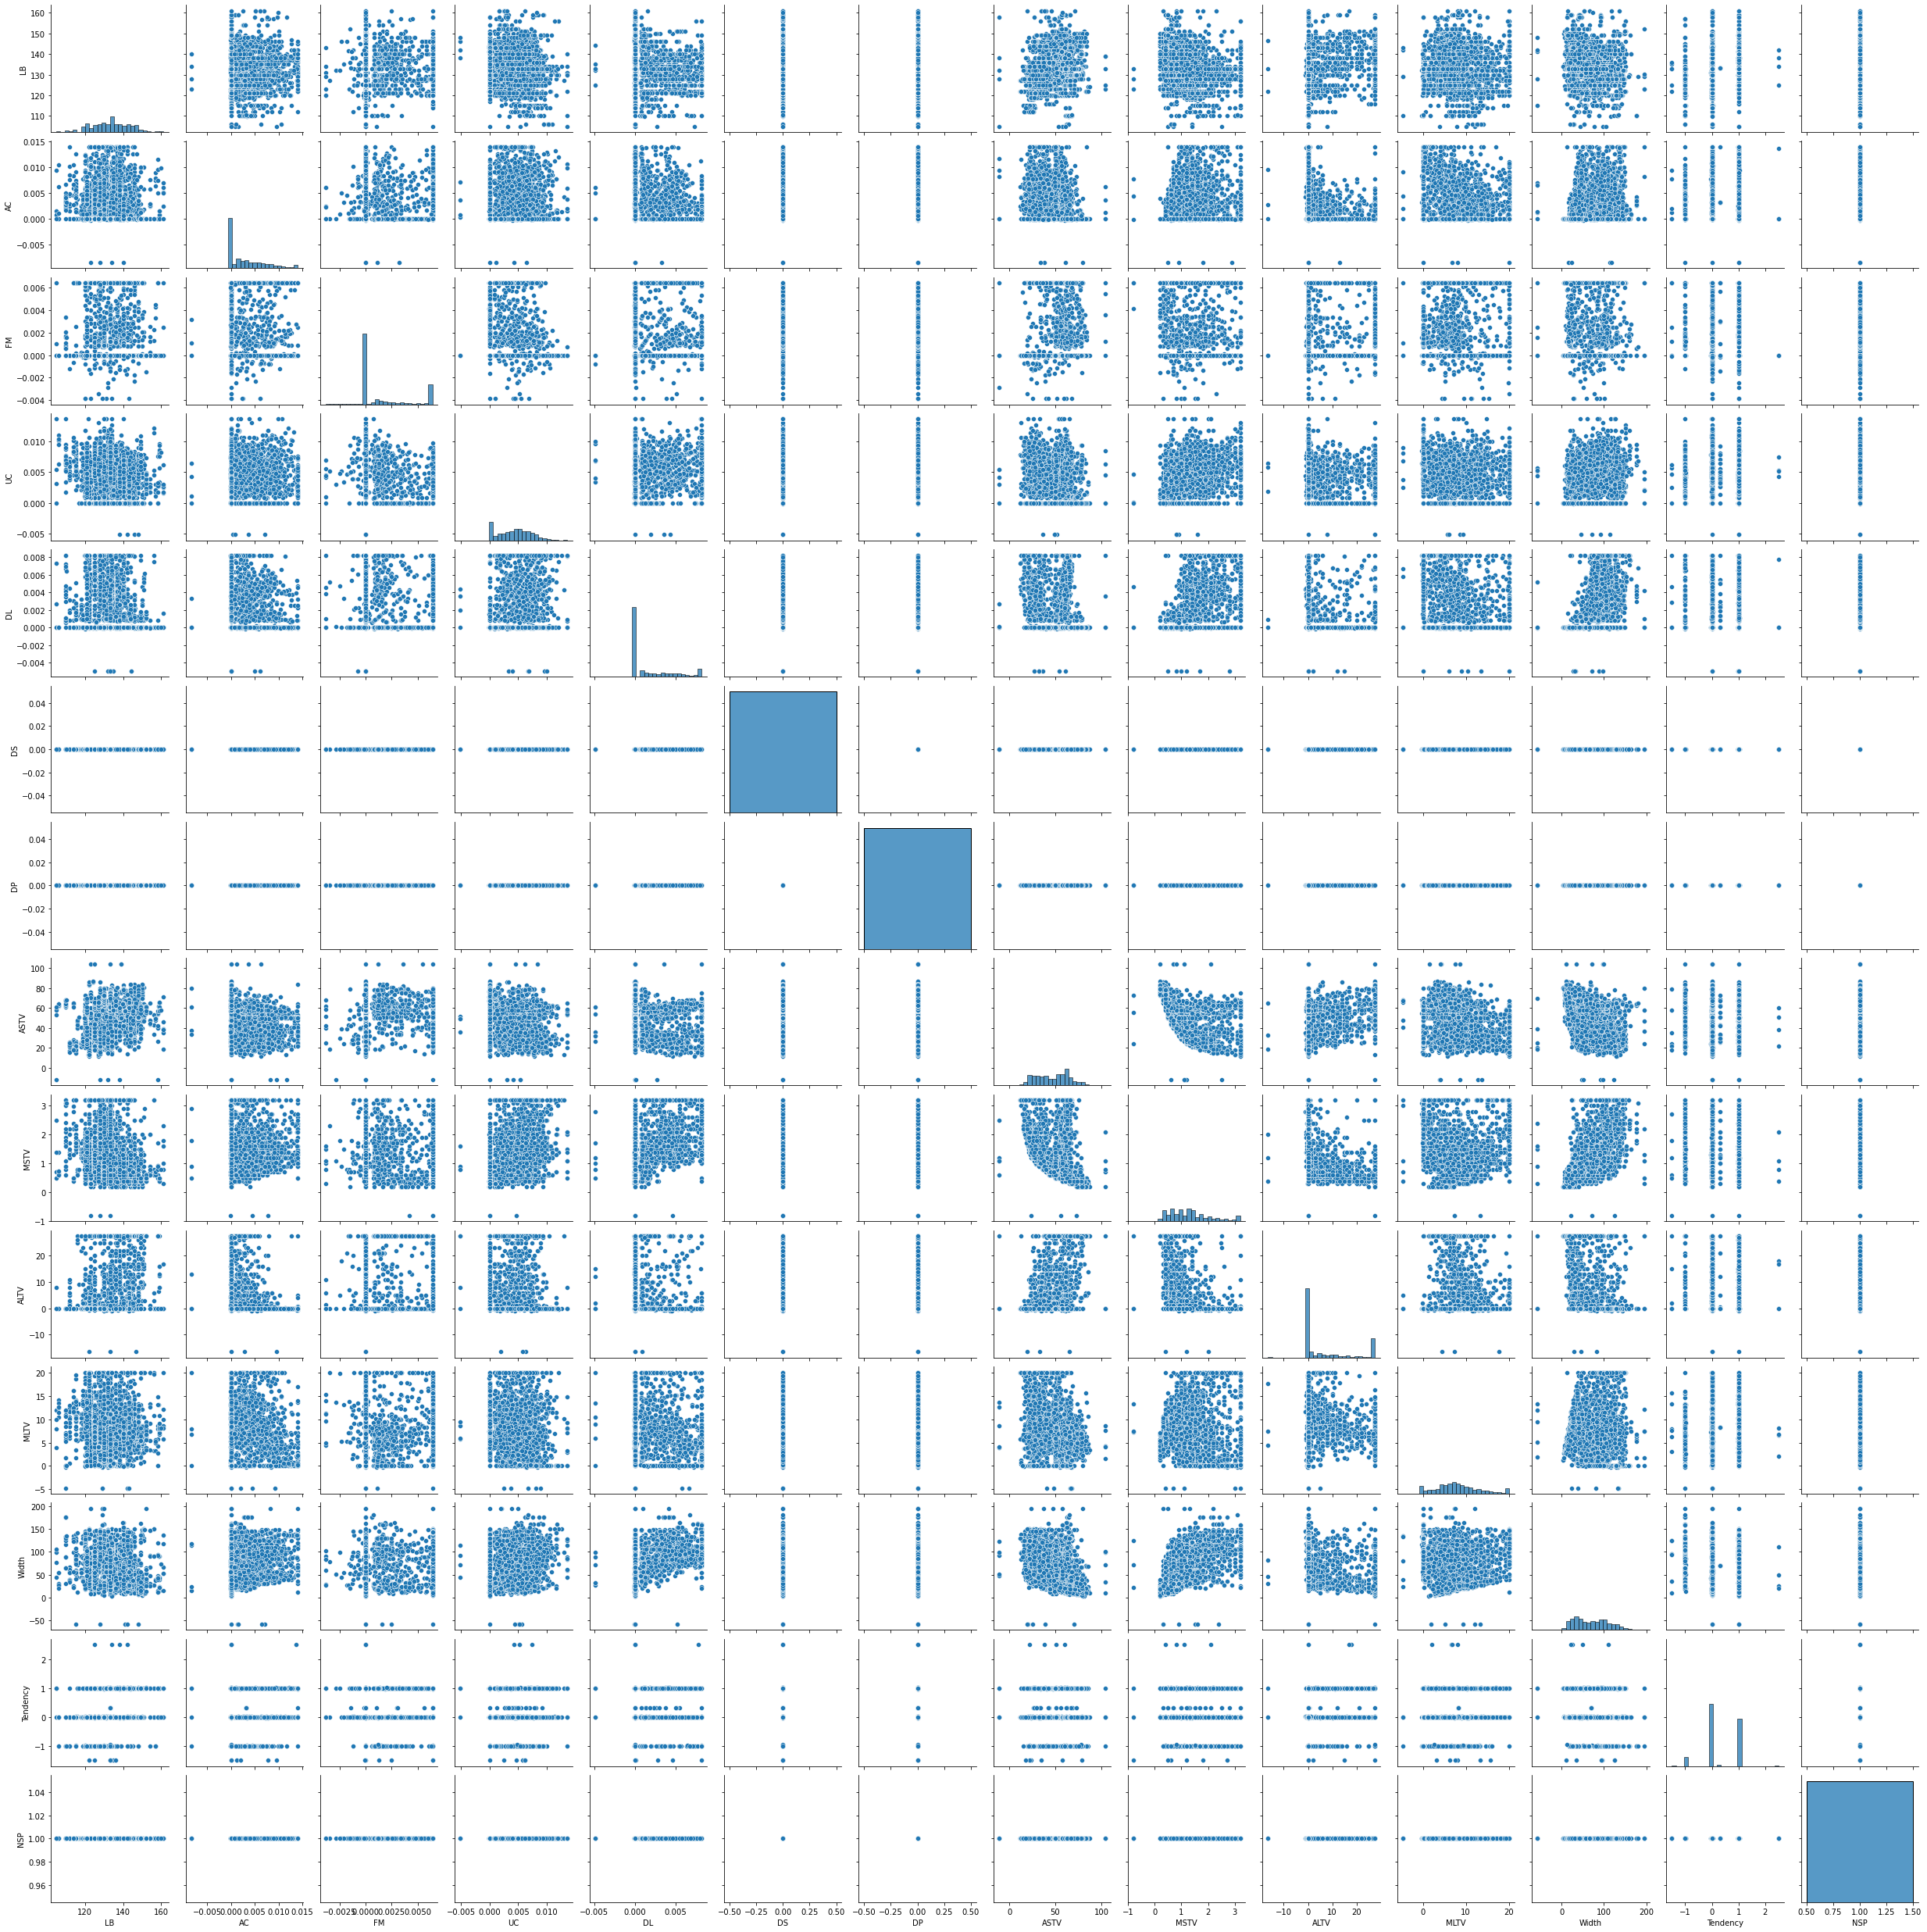

In [92]:
sns.pairplot(df)
plt.show()

# 4. Pattern Recognition and insights

In [93]:
# Calculate correlation matrix
correlation_matrix = df.corr()
# Display the correlation matrix
correlation_matrix

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.081669,-0.006815,-0.163308,-0.156278,NaN,NaN,0.285463,-0.295017,0.322748,-0.042275,-0.140008,0.281361,NaN
AC,-0.081669,1.000000,0.076091,0.093575,-0.102934,NaN,NaN,-0.273178,0.217933,-0.409829,-0.152032,0.283771,0.029333,NaN
FM,-0.006815,0.076091,1.000000,-0.318156,-0.018024,NaN,NaN,0.155798,0.070412,-0.013820,-0.036313,0.164247,0.000673,NaN
UC,-0.163308,0.093575,-0.318156,1.000000,0.268151,NaN,NaN,-0.217484,0.298462,-0.294226,-0.072964,0.131110,-0.074266,NaN
DL,-0.156278,-0.102934,-0.018024,0.268151,1.000000,NaN,NaN,-0.112289,0.566625,-0.296383,-0.242173,0.514348,0.014583,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.285463,-0.273178,0.155798,-0.217484,-0.112289,NaN,NaN,1.000000,-0.433731,0.438800,-0.323958,-0.242124,-0.010278,NaN
MSTV,-0.295017,0.217933,0.070412,0.298462,0.566625,NaN,NaN,-0.433731,1.000000,-0.541296,0.011322,0.646468,-0.063075,NaN
ALTV,0.322748,-0.409829,-0.013820,-0.294226,-0.296383,NaN,NaN,0.438800,-0.541296,1.000000,-0.133185,-0.439913,0.050549,NaN


## Summary Report

## Key Insights

#### Baseline Fetal Heart Rate (LB): The mean and median values indicate the central tendency of the baseline FHR.

#### Accelerations (AC): Visualizations show a distribution pattern for accelerations.

#### Fetal Movements (FM): The data shows a certain range and variability in fetal movements.

#### Uterine Contractions (UC): Analysis of uterine contractions and their potential impact on FHR patterns.

#### Decelerations (DL, DS, DP): Understanding the different types of decelerations and their occurrence.

#### Variability (ASTV, MSTV, ALTV, MLTV): Insights into short-term and long-term variability in FHR.